In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier, XGBRFClassifier
import function as fnc

# Content

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

# 1 Initial data processing

In [2]:
# importing dataset
df_raw = pd.read_csv("creditcard.csv")

In [3]:
df_raw

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# checking data types and possible null data
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

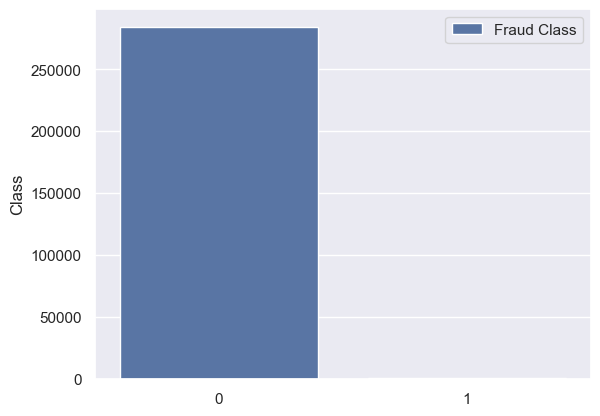

In [5]:
# ploting difference between Class 0 (legit) and Class 1 (Fraudulent) tarnsactions. Confirming high unbalanced dataset, as described before.
sns.set(style="darkgrid")
sns.barplot(x=df_raw["Class"].value_counts().index, y=df_raw["Class"].value_counts(), label="Fraud Class")
plt.legend()
plt.show()

In [6]:
# double-checking the unbalancing scale of the dataset
df_raw["Class"].value_counts(normalize=True)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

# 2 Estimate the current losses due to fraudulent transactions

In [7]:
# some measures of central tendency and dispersion for each transaction class
raw_est_df = df_raw.groupby("Class").agg(["mean", "median", "std", "sum"])["Amount"]
raw_est_df

,mean,median,std,sum
Class,,,,
0,88.291022,22.00,250.105092,25102462.04
1,122.211321,9.25,256.683288,60127.97


In [8]:
# double checking last transaction timedelta from the first transaction (hours)
df_raw["Time"].iloc[-1]/3600

47.99777777777778

In [9]:
legit_rev = raw_est_df.loc[0, 'sum']/2
fraud_tran = raw_est_df.loc[1, 'sum']/2
print(f"Revenue per day of legit transactions: ${legit_rev:,.2f}.")
print(f"Fraudulent transactions per day:         - ${fraud_tran:,.2f}.")
print(f"Net revenue per day:                   ${(legit_rev - fraud_tran):,.2f}.")


Revenue per day of legit transactions: $12,551,231.02.
Fraudulent transactions per day:         - $30,063.99.
Net revenue per day:                   $12,521,167.04.


# 3 Exploratory Data Analysis (EDA)

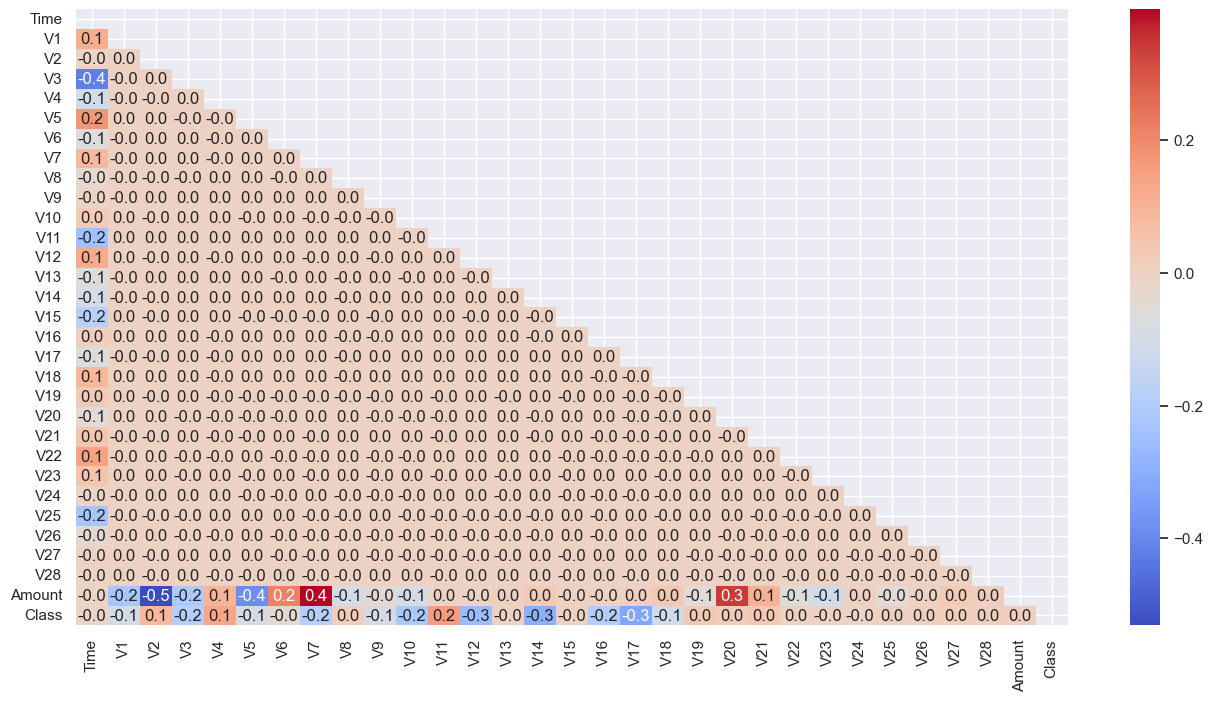

In [10]:
# plotting correlation heatmap for the dataset
plt.figure(figsize=(16, 8))
sns.heatmap(df_raw.corr(), annot=True, fmt=".1f", mask=np.triu(np.ones_like(df_raw.corr())), cmap="coolwarm");

In [11]:
# selecting the top 5 negative correlation with Class target variable
top5_corr_feat = df_raw.corr()["Class"].sort_values().head(5).index.to_list()

In [12]:
# pairplot of correlated features with Class target variable
# fig = sns.pairplot(data=df_raw.loc[:,top5_corr_feat + ["Class"]], hue="Class", corner=True, diag_kind="kde")
# plt.savefig("pairplot_feat.png")

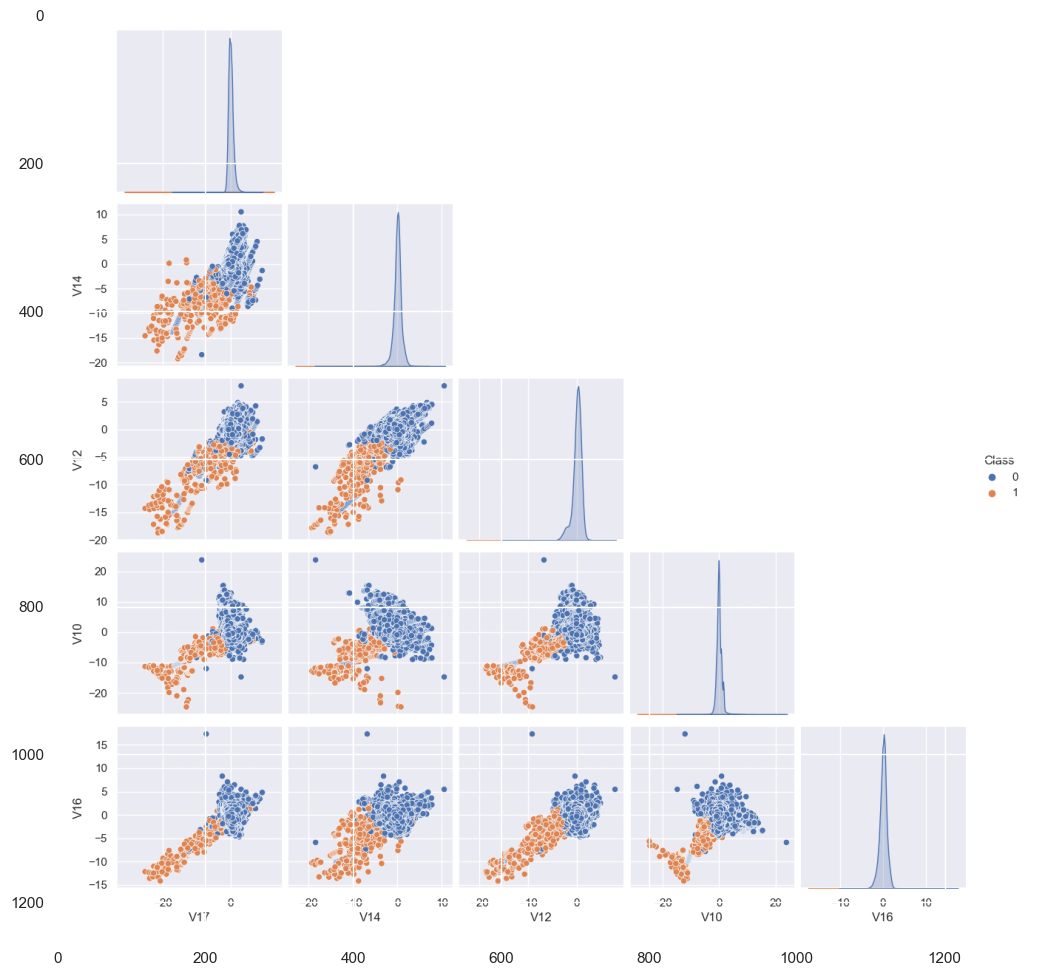

In [13]:
# pairplot of top5 correlated features with Class types (0: legit; 1: fraudulent)
img = plt.imread("pairplot_feat.png")
plt.figure(figsize=(20, 12))
plt.imshow(img)
plt.show()

Correlation heatmap shows us that there are mainly negative correlation between features and Class target variable. Also, the pairplot containing the most correlated features (considering Class target variable) confirm that fraudulent transactions are negative correlated with those features.

# 4 Training models

In [14]:
# splitting train/test sets
target = "Class"
X = df_raw.drop(columns=target)
y = df_raw[target]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4.1 Logistic regression

### 4.1.1 Unbalanced class weight

In [16]:
logreg = LogisticRegression()

In [17]:
logreg.fit(X_train, y_train)

c:\Users\rafae\Desktop\repos\fraud_detection\venv\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [18]:
y_pred_logreg = logreg.predict(X_test)

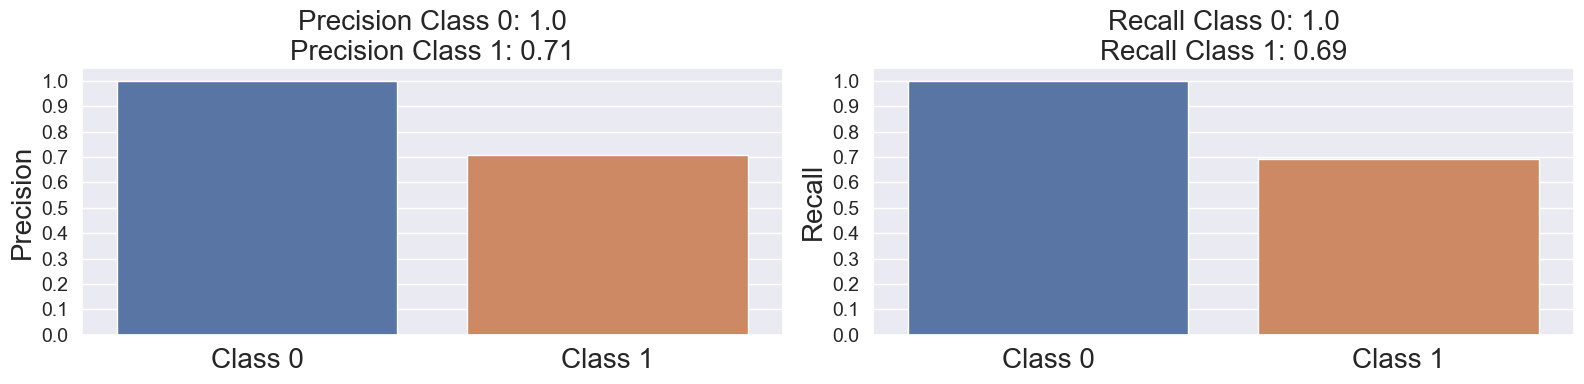

In [19]:
fnc.plot_precision_recall(y_test, y_pred_logreg)

In [20]:
# complete model metrics
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.69      0.70        98

    accuracy                           1.00     56962
   macro avg       0.85      0.85      0.85     56962
weighted avg       1.00      1.00      1.00     56962



### 4.1.2 Balanced class weight

In [21]:
logreg_bal = LogisticRegression(class_weight="balanced", random_state=42)
logreg_bal.fit(X_train, y_train)
y_pred_logreg_bal = logreg_bal.predict(X_test)

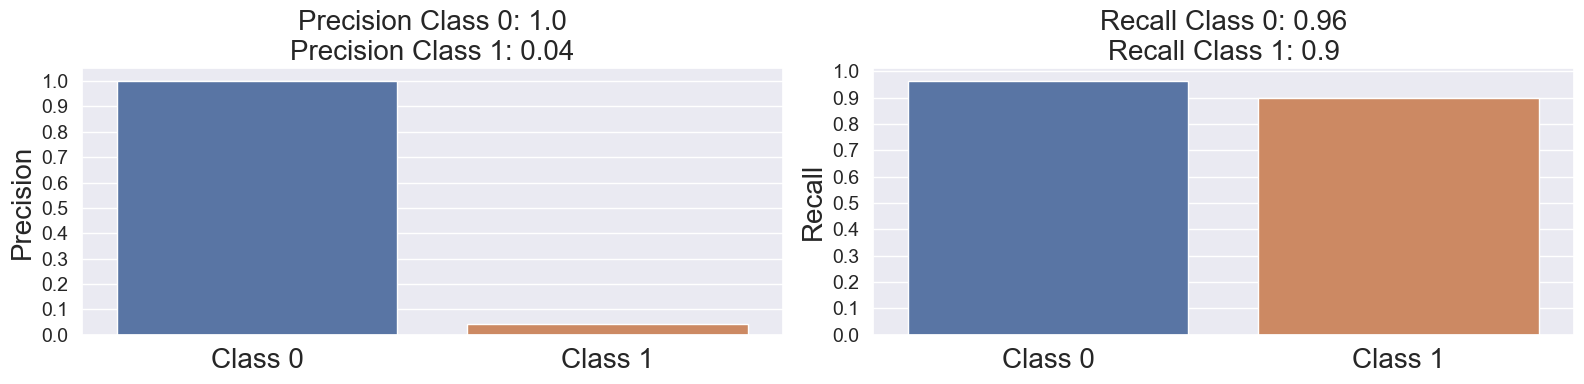

In [22]:
fnc.plot_precision_recall(y_test, y_pred_logreg_bal)

In [23]:
print(classification_report(y_test, y_pred_logreg_bal))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.90      0.08        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962



## 4.2 Decision tree

In [24]:
dtree = DecisionTreeClassifier(class_weight="balanced", random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

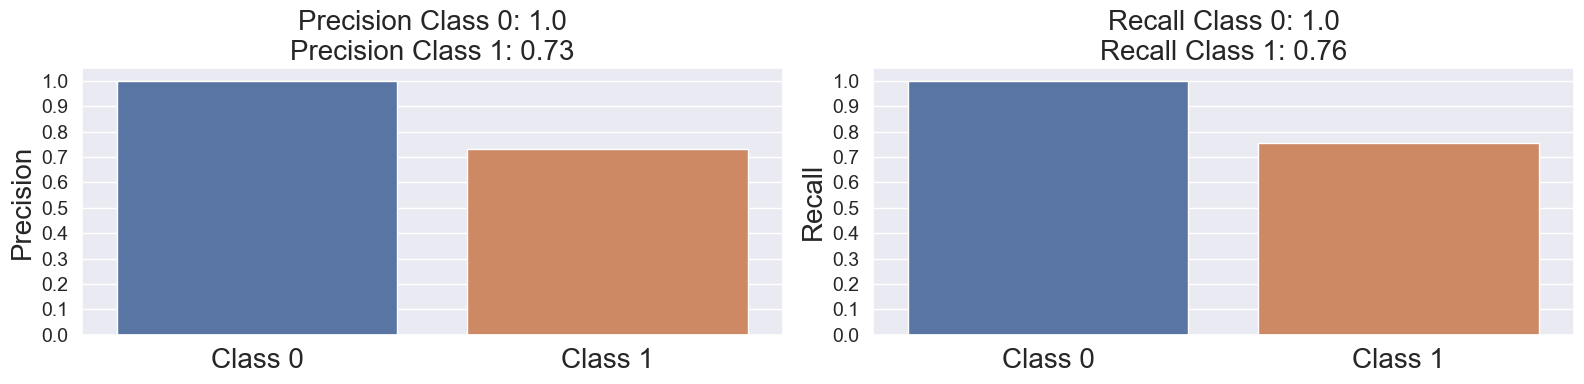

In [25]:
fnc.plot_precision_recall(y_test, y_pred_dtree)

In [26]:
print(classification_report(y_test, y_pred_dtree))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.76      0.74        98

    accuracy                           1.00     56962
   macro avg       0.87      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962



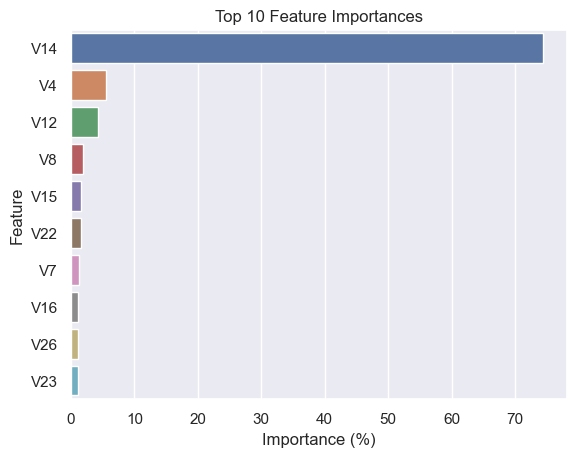

In [27]:
fnc.plot_feature_importances(dtree)

## 4.3 Random forest

In [28]:
randfor = RandomForestClassifier(class_weight="balanced", random_state=42)
randfor.fit(X_train, y_train)
y_pred_randfor = randfor.predict(X_test)

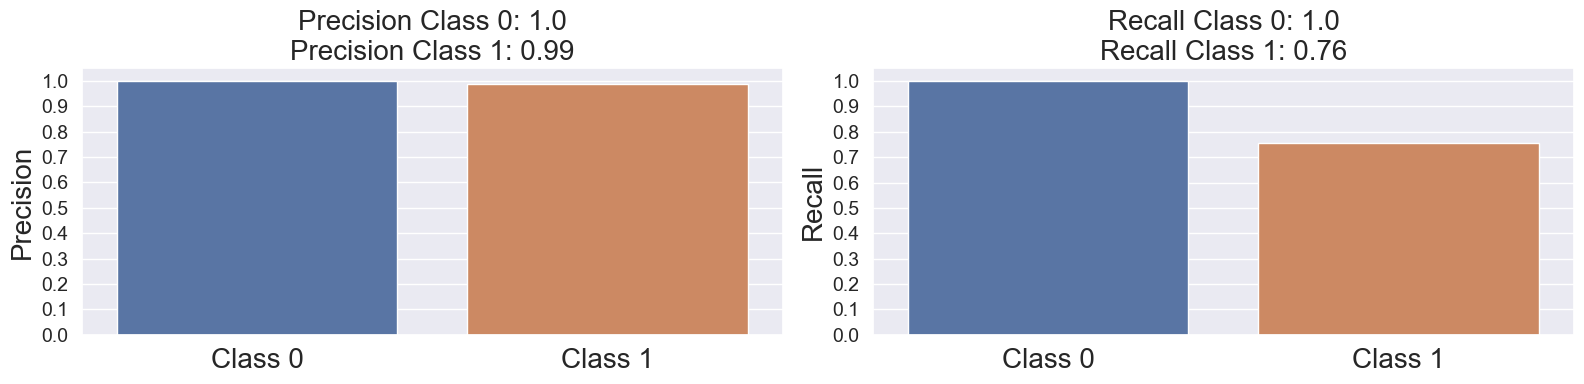

In [29]:
fnc.plot_precision_recall(y_test, y_pred_randfor)

In [30]:
print(classification_report(y_test, y_pred_randfor))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.76      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



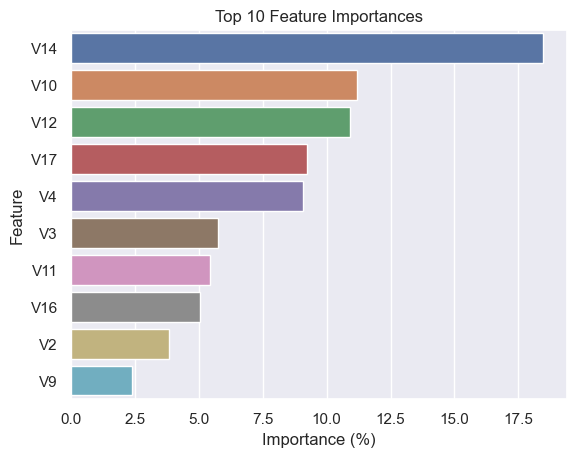

In [31]:
fnc.plot_feature_importances(randfor)

## 4.4 XGBoost

In [32]:
# calculating the scale 0's/1's
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

### 4.4.1 XGBoost Classifier

In [33]:
xgbclass = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgbclass.fit(X_train, y_train)
y_pred_xgbclass = xgbclass.predict(X_test)

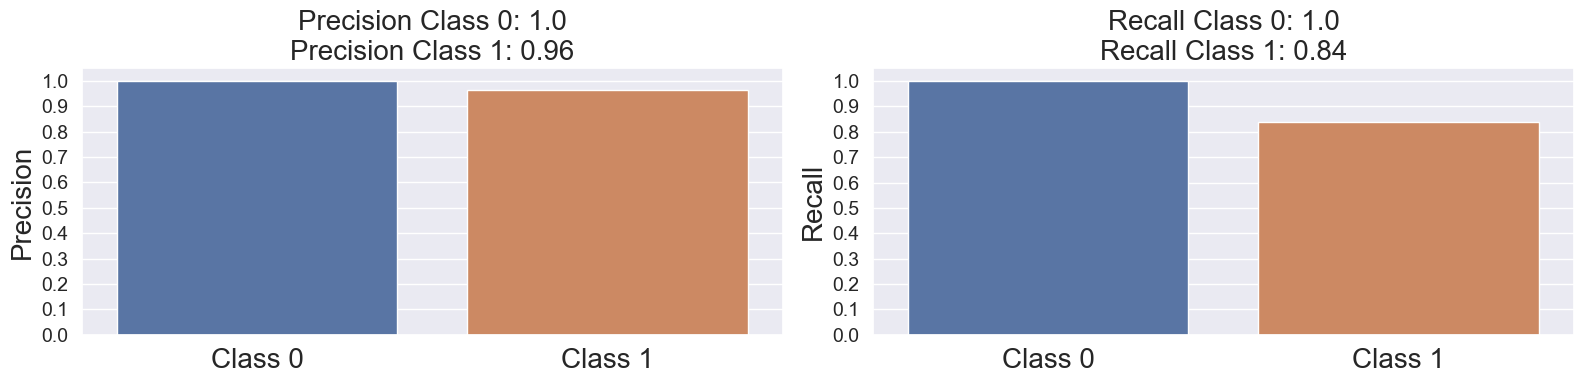

In [34]:
fnc.plot_precision_recall(y_test, y_pred_xgbclass)

In [35]:
print(classification_report(y_test, y_pred_xgbclass))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.84      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



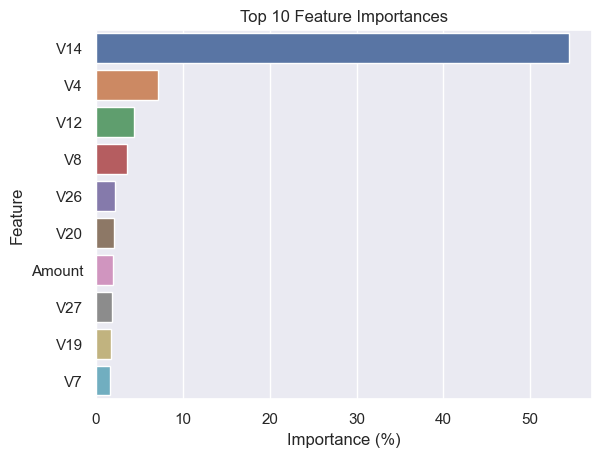

In [36]:
fnc.plot_feature_importances(xgbclass)

### 4.4.2 XGBoost Random Forest Classifier

In [37]:
xgbrfclass = XGBRFClassifier(scale_pos_weight=scale_pos_weight, random_state=42)
xgbrfclass.fit(X_train, y_train)
y_pred_xgbrf = xgbrfclass.predict(X_test)

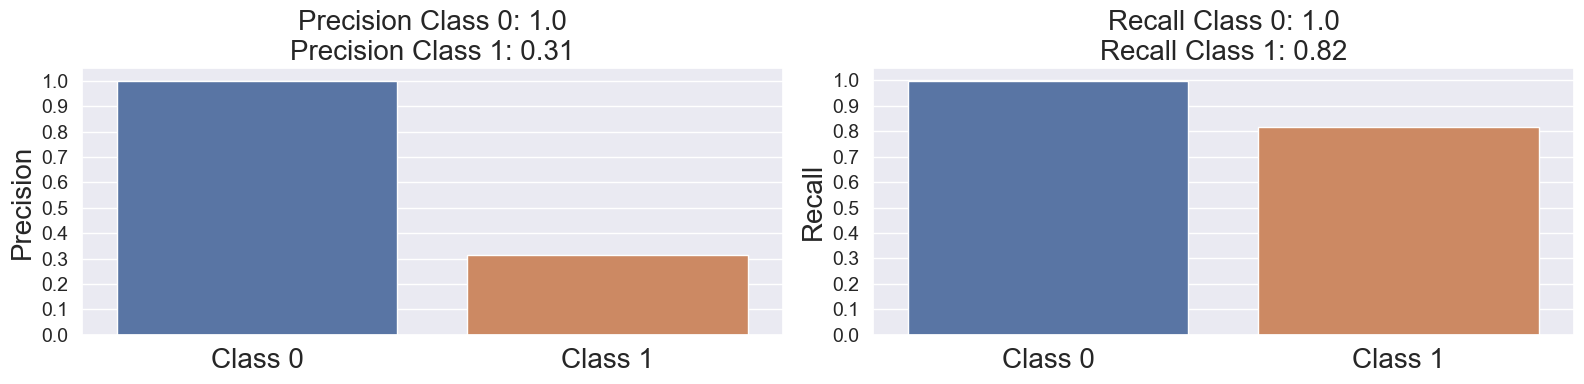

In [38]:
fnc.plot_precision_recall(y_test, y_pred_xgbrf)

In [39]:
print(classification_report(y_test, y_pred_xgbrf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.31      0.82      0.45        98

    accuracy                           1.00     56962
   macro avg       0.66      0.91      0.73     56962
weighted avg       1.00      1.00      1.00     56962



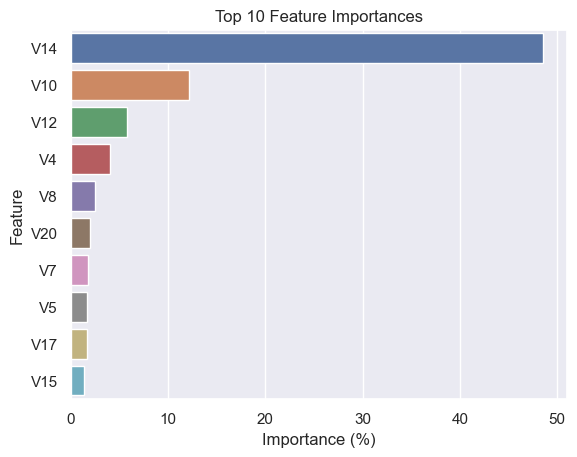

In [40]:
fnc.plot_feature_importances(xgbrfclass)

# 5 Evaluating the results

In [41]:
# Calculating net revenue of test set ()
print(f"Test set revenue: ${round(X_test[(y_test == 0)]['Amount'].sum() -  X_test[(y_test == 1)]['Amount'].sum(), 2)}.")

Test set revenue: $4970709.22.


Considering that each transaction labeled as fraud should generate a second authentication procedure to ensure a final legit transaction (assuming a $1 cost per extra authentication procedure), let us evaluate the models metrics concerning their respective:
- Fraudulent caught losses prevented (True Positives)                > Revenue
- Fraudulent not caught losses (False negatives)                     > Cost
- Transactions labeled as fraud (False positives + True positives)   > Cost

## 5.1 Logistic Regression  unbalanced class Results

In [42]:
fnc.calculate_net_revenue(X_test["Amount"], y_test, y_pred_logreg)

Fraudulent Caught losses prevented: $7562.79
Fraudulent not Caught losses: $8515.61
Transactions labeled as fraud (cost due to second authentication procedures): $96.00
Net Revenue Fraud detection model: $-1048.82


## 5.2 Logistic Regression balanced class Results

In [43]:
fnc.calculate_net_revenue(X_test["Amount"], y_test, y_pred_logreg_bal)

Fraudulent Caught losses prevented: $13165.65
Fraudulent not Caught losses: $2912.75
Transactions labeled as fraud (cost due to second authentication procedures): $2155.00
Net Revenue Fraud detection model: $8097.90


## 5.3 Decision tree Results

In [44]:
fnc.calculate_net_revenue(X_test["Amount"], y_test, y_pred_dtree)

Fraudulent Caught losses prevented: $10796.30
Fraudulent not Caught losses: $5282.10
Transactions labeled as fraud (cost due to second authentication procedures): $101.00
Net Revenue Fraud detection model: $5413.20


## 5.4 Random forest Results

In [45]:
fnc.calculate_net_revenue(X_test["Amount"], y_test, y_pred_randfor)

Fraudulent Caught losses prevented: $11077.85
Fraudulent not Caught losses: $5000.55
Transactions labeled as fraud (cost due to second authentication procedures): $75.00
Net Revenue Fraud detection model: $6002.30


## 5.5 XGBoost Classifier Results

In [46]:
fnc.calculate_net_revenue(X_test["Amount"], y_test, y_pred_xgbclass)

Fraudulent Caught losses prevented: $12345.70
Fraudulent not Caught losses: $3732.70
Transactions labeled as fraud (cost due to second authentication procedures): $85.00
Net Revenue Fraud detection model: $8528.00


## 5.6 XGBoost Random Forest Classifier Results

In [47]:
fnc.calculate_net_revenue(X_test["Amount"], y_test, y_pred_xgbrf)

Fraudulent Caught losses prevented: $11141.69
Fraudulent not Caught losses: $4936.71
Transactions labeled as fraud (cost due to second authentication procedures): $255.00
Net Revenue Fraud detection model: $5949.98


# 6 Results Summary

In [48]:
predictions = [y_pred_logreg, y_pred_logreg_bal, y_pred_dtree, y_pred_randfor, y_pred_xgbclass, y_pred_xgbrf]
models = ["LogReg", "LogReg_balanced", "DecisionTree", "RandomForest", "XGBoostClass", "XGBoostRF"]

results = {}
for i, pred in enumerate(predictions):
    results[models[i]] = fnc.calculate_net_revenue(X_test["Amount"], y_test, pred, results=False)

In [49]:
summary = pd.DataFrame(
    results, 
    index= ["Fraudulent Caught losses prevented", "Fraudulent not Caught losses", "Transactions labeled as fraud", "Net Revenue Fraud detection model"]
    )

In [50]:
summary

,LogReg,LogReg_balanced,DecisionTree,RandomForest,XGBoostClass,XGBoostRF
Fraudulent Caught losses prevented,7562.79,13165.65,10796.3,11077.85,12345.7,11141.69
Fraudulent not Caught losses,8515.61,2912.75,5282.1,5000.55,3732.7,4936.71
Transactions labeled as fraud,96.00,2155.00,101.0,75.00,85.0,255.00
Net Revenue Fraud detection model,-1048.82,8097.90,5413.2,6002.30,8528.0,5949.98
